## Capstone Midterm Project NBA Salary Regression Analysis

In [1]:
# Package List

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import math 
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score, accuracy_score, balanced_accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error
import statsmodels.api as sm
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Importing Data sets
# Metadata for both datasets can be found in the following link:
# https://www.kaggle.com/datasets/ulrikthygepedersen/nba-player-salaries?select=players.csv

players = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/players.csv")
salaries = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/salaries_1985to2018.csv")

players.rename(columns = {"_id" : "player_id"}, inplace = True)
# salaries = salaries.rename({"player_id" : "player_id"})

### Initial Data Exploration

In [3]:
# Check to see null values within both data sets

print(players.isnull().sum())
print(" ")
print(salaries.isnull().sum())

player_id         0
birthDate        28
birthPlace      500
career_AST        0
career_FG%        0
career_FG3%    1128
career_FT%        0
career_G          0
career_PER        0
career_PTS        0
career_TRB        0
career_WS         0
career_eFG%    1128
college         313
draft_pick     1316
draft_round    1178
draft_team     1178
draft_year     1379
height            0
highSchool      660
name              0
position          0
shoots            1
weight            5
dtype: int64
 
league          0
player_id       0
salary          0
season          0
season_end      0
season_start    0
team            4
dtype: int64


In [4]:
# Checking data types for both sets 

print(players.info())
print(" ")
print(salaries.info())

print(" ")
print(players.shape)
print(salaries.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    4685 non-null   object 
 1   birthDate    4657 non-null   object 
 2   birthPlace   4185 non-null   object 
 3   career_AST   4685 non-null   float64
 4   career_FG%   4685 non-null   object 
 5   career_FG3%  3557 non-null   object 
 6   career_FT%   4685 non-null   object 
 7   career_G     4685 non-null   int64  
 8   career_PER   4685 non-null   object 
 9   career_PTS   4685 non-null   float64
 10  career_TRB   4685 non-null   object 
 11  career_WS    4685 non-null   object 
 12  career_eFG%  3557 non-null   object 
 13  college      4372 non-null   object 
 14  draft_pick   3369 non-null   object 
 15  draft_round  3507 non-null   object 
 16  draft_team   3507 non-null   object 
 17  draft_year   3306 non-null   object 
 18  height       4685 non-null   object 
 19  highSc

In [5]:
# Check for duplicated rows

print(players.duplicated().sum())
print(salaries.duplicated().sum())

0
0


In [6]:
# Dividing the salaries based of the three different eras in basketball: Classic, Transitional and Modern 

classic_era_salaries = salaries.loc[(salaries['season_start'] >= 1980) & (salaries['season_start'] < 1994)]
transitional_era_salaries = salaries.loc[(salaries['season_start'] >= 1995) & (salaries['season_start'] < 2013)]
modern_era_salaries = salaries.loc[(salaries['season_start'] >= 2013)]

print("Classic Era")
print(classic_era_salaries.describe())
print(" ")
print("Transitional Era")
print(transitional_era_salaries.describe())
print(" ")
print("Modern Era")
print(modern_era_salaries.describe())

Classic Era
             salary   season_end  season_start
count  2.772000e+03  2772.000000   2772.000000
mean   8.018654e+05  1990.228716   1989.228716
std    7.650165e+05     2.916806      2.916806
min    5.000000e+03  1985.000000   1984.000000
25%    2.500000e+05  1988.000000   1987.000000
50%    5.500000e+05  1991.000000   1990.000000
75%    1.100000e+06  1993.000000   1992.000000
max    7.070000e+06  1994.000000   1993.000000
 
Transitional Era
             salary   season_end  season_start
count  8.386000e+03  8386.000000   8386.000000
mean   3.489818e+06  2004.705342   2003.705342
std    3.979696e+06     5.112624      5.112624
min    2.706000e+03  1996.000000   1995.000000
25%    8.377985e+05  2000.000000   1999.000000
50%    2.000000e+06  2005.000000   2004.000000
75%    4.587474e+06  2009.000000   2008.000000
max    3.314000e+07  2013.000000   2012.000000
 
Modern Era
             salary   season_end  season_start
count  2.587000e+03  2587.000000   2587.000000
mean   4.935068e

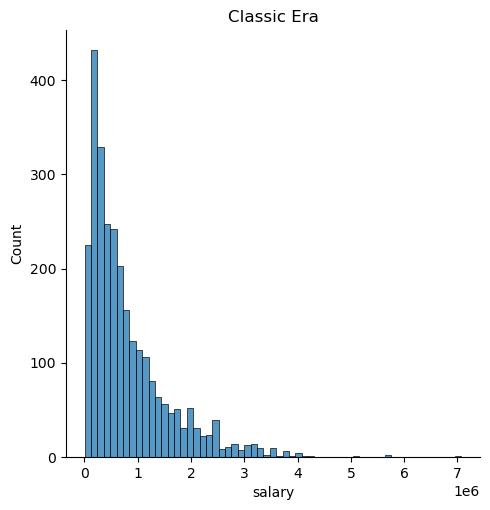

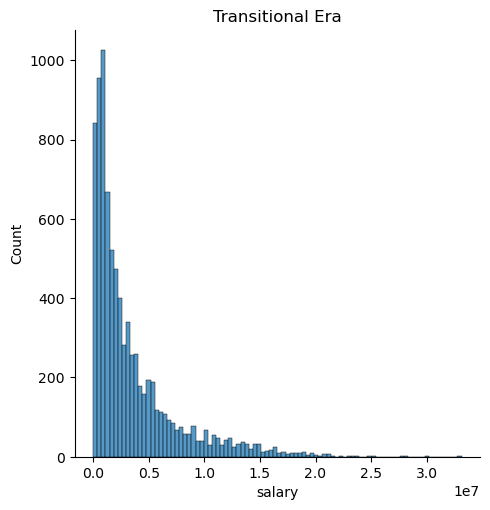

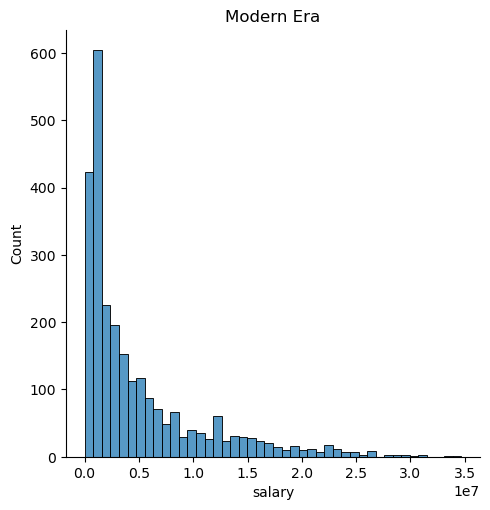

In [7]:
# Checking the distribution of salaries for each of the eras of basketball 

sns.displot(classic_era_salaries, x = "salary").set(title = "Classic Era")
sns.displot(transitional_era_salaries, x = "salary").set(title = "Transitional Era")
sns.displot(modern_era_salaries, x = "salary").set(title = "Modern Era")

In [8]:
# Merging datasets into their respective dataset for ease of use 

classic_era = pd.merge(classic_era_salaries, players, on = 'player_id')
transition_era = pd.merge(transitional_era_salaries, players, on = 'player_id')
modern_era = pd.merge(modern_era_salaries, players, on = 'player_id')

print(classic_era.shape)
print(transition_era.shape)
print(modern_era.shape)

# missing 418 rows 

(2772, 30)
(8386, 30)
(2587, 30)


In [9]:
# Finding the maximum salaries for each of the Eras 

classic_max = classic_era.loc[classic_era['salary'].idxmax()]
print(classic_max)
print("\n")
transitional_max = transition_era.loc[transition_era['salary'].idxmax()]
print(transitional_max)
print("\n")
modern_max = modern_era.loc[modern_era['salary'].idxmax()]
print(modern_max)


league                                             NBA
player_id                                     birdla01
salary                                         7070000
season                                         1991-92
season_end                                        1992
season_start                                      1991
team                                    Boston Celtics
birthDate                             December 7, 1956
birthPlace                         West Baden, Indiana
career_AST                                         6.3
career_FG%                                        49.6
career_FG3%                                       37.6
career_FT%                                        88.6
career_G                                           897
career_PER                                        23.5
career_PTS                                        24.3
career_TRB                                        10.0
career_WS                                        145.8
career_eFG

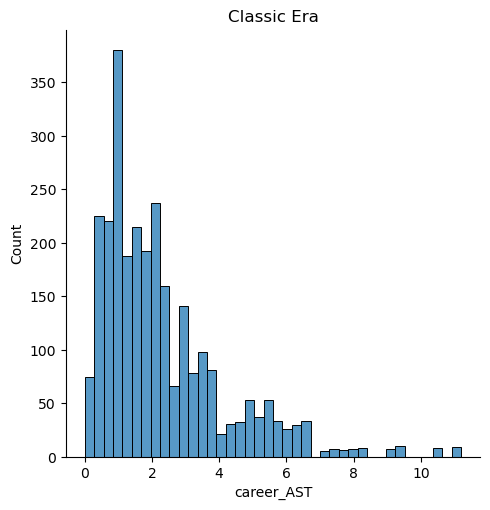

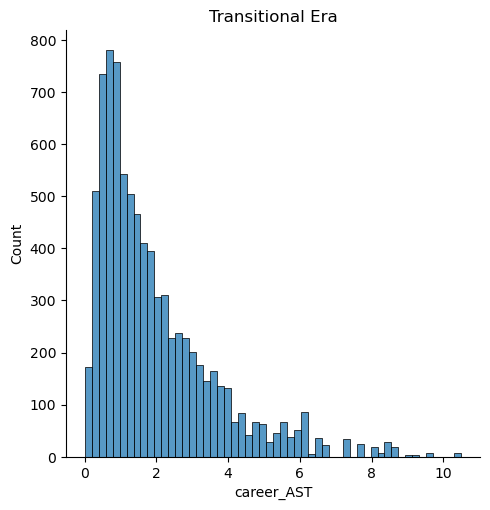

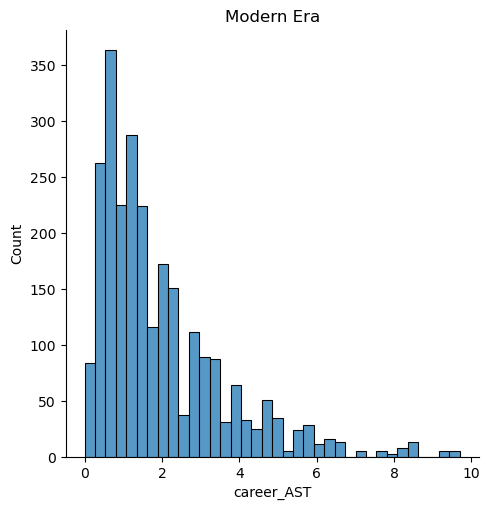

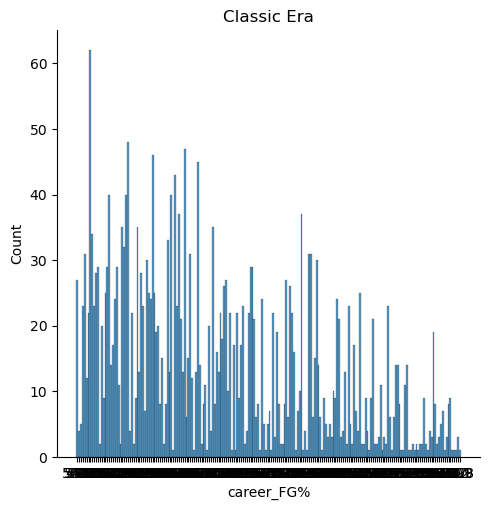

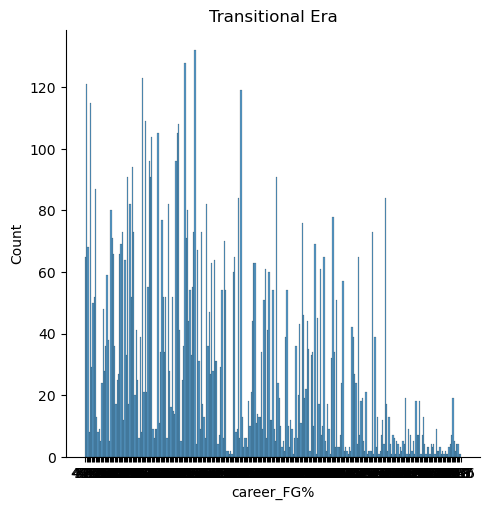

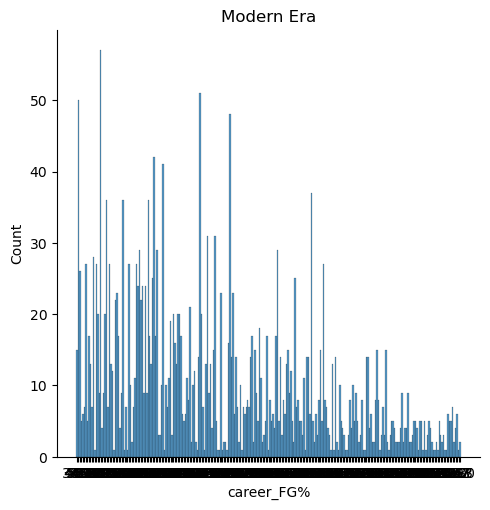

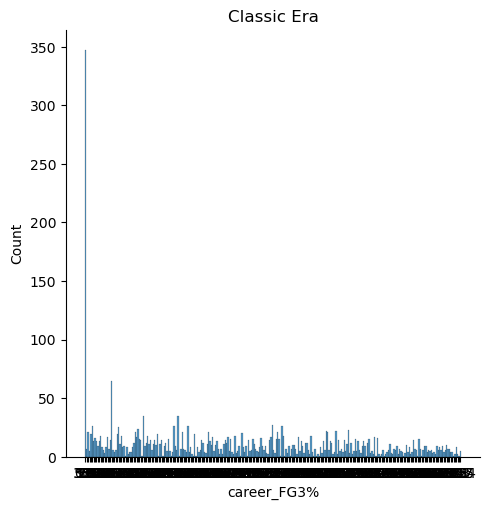

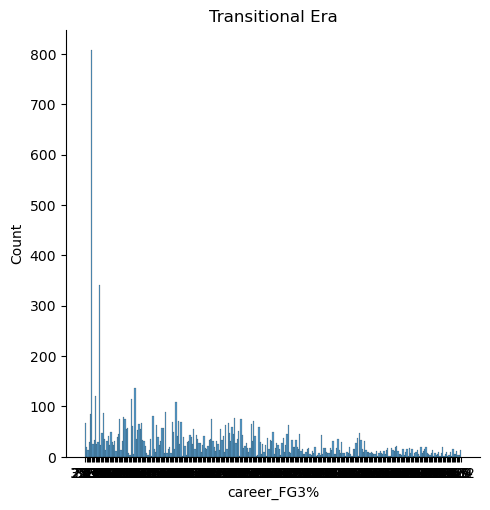

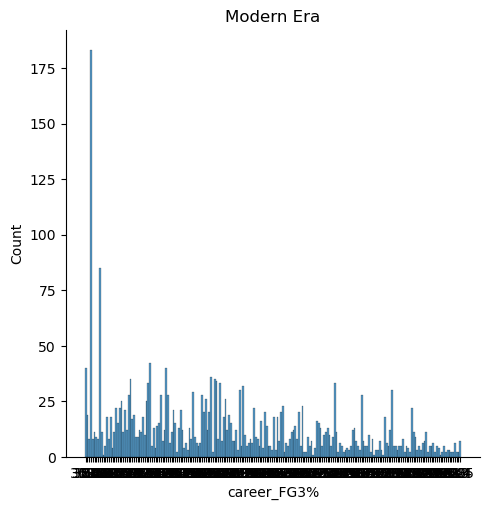

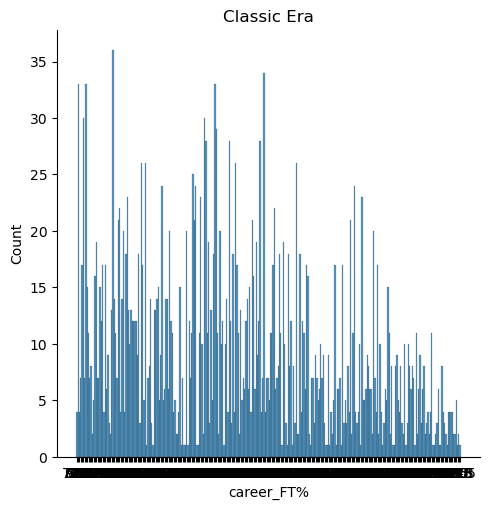

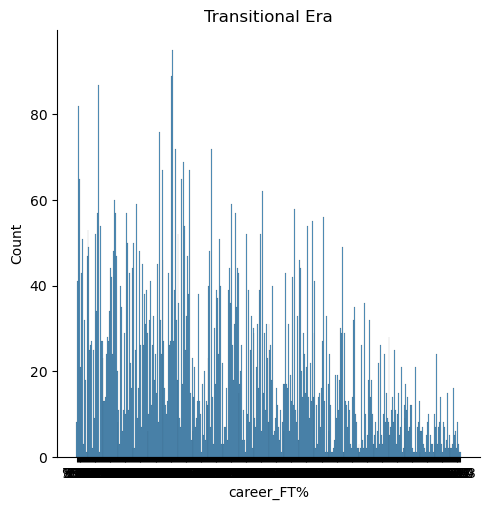

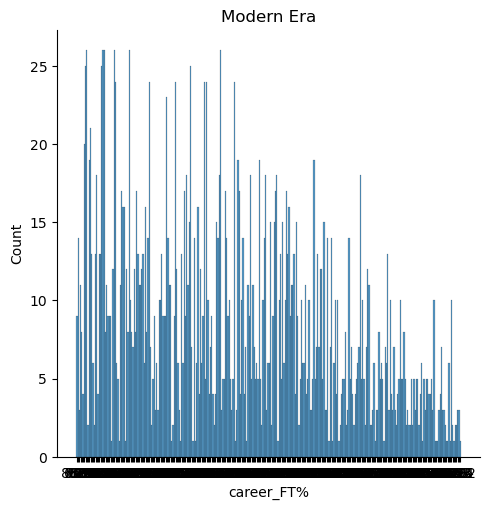

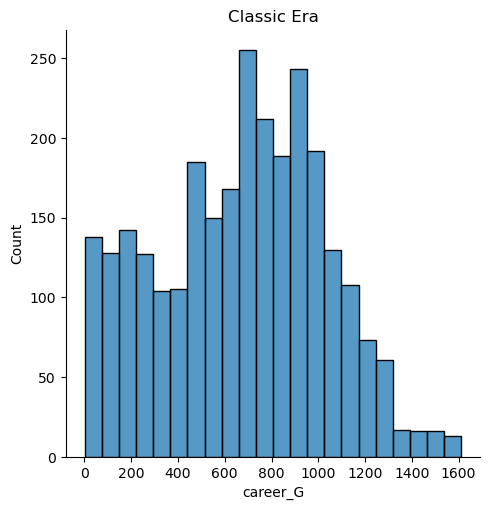

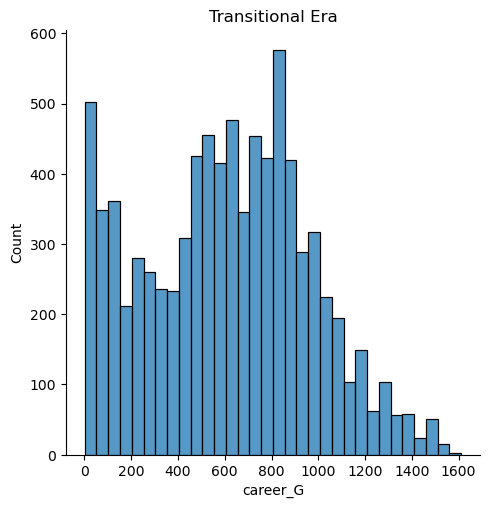

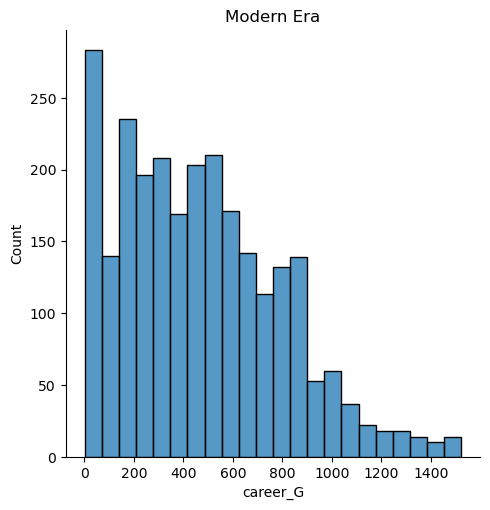

In [ ]:
# Distribution Plots of Careers stats

subs = "career"
res = [i for i in classic_era.columns if subs in i]

for column in res:
    sns.displot(classic_era, x = column).set(title = "Classic Era")
    sns.displot(transition_era, x = column).set(title = "Transitional Era")
    sns.displot(modern_era, x = column).set(title = "Modern Era")
    plt.show()



In [ ]:
# Scatter plot of Career FG% against Salary for all Eras

plt.scatter(classic_era['career_FG%'], classic_era['salary'])
plt.xlabel("Career FG %")
plt.ylabel("Salary")
plt.title("Career FG% vs Salary for the Classic Era")
plt.xticks([])
plt.show()

plt.scatter(transition_era['career_FG%'], transition_era['salary'])
plt.xlabel("Career FG %")
plt.ylabel("Salary")
plt.title("Career FG% vs Salary for the Transitional Era")
plt.xticks([])
plt.show()

plt.scatter(modern_era['career_FG%'], modern_era['salary'])
plt.xlabel("Career FG %")
plt.ylabel("Salary")
plt.title("Career FG% vs Salary for the Modern Era")
plt.xticks([])
plt.show()

In [ ]:
# Scatter plot for career win share vs salary for all eras

plt.scatter(classic_era['career_WS'], classic_era['salary'])
plt.xlabel("Career Win Shares")
plt.ylabel("Salary")
plt.title("Career Win Shares vs Salary for the Classic Era")
plt.xticks([])
plt.show()

plt.scatter(transition_era['career_WS'], transition_era['salary'])
plt.xlabel("Career Win Shares")
plt.ylabel("Salary")
plt.title("Career Win Shares vs Salary for the Transition Era")
plt.xticks([])
plt.show()

plt.scatter(modern_era['career_WS'], modern_era['salary'])
plt.xlabel("Career Win Shares")
plt.ylabel("Salary")
plt.title("Career Win Shares vs Salary for the Modern Era")
plt.xticks([])
plt.show()

In [ ]:
# Career points vs salary for all eras

plt.scatter(classic_era['career_PTS'], classic_era['salary'])
plt.xlabel("Career Points Per Match")
plt.ylabel("Salary")
plt.title("Career Points Per Match vs Salary for the Classic Era")
plt.show()

plt.scatter(transition_era['career_PTS'], transition_era['salary'])
plt.xlabel("Career Points Per Match")
plt.ylabel("Salary")
plt.title("Career Points Per Match vs Salary for the Transition Era")
plt.show()

plt.scatter(modern_era['career_PTS'], modern_era['salary'])
plt.xlabel("Career Points Per Match")
plt.ylabel("Salary")
plt.title("Career Points Per Match vs Salary for the Modern Era")
plt.show()

In [ ]:
# Scatter plot of Career PER against Salary for all Eras

plt.scatter(classic_era['career_PER'], classic_era['salary'])
plt.xlabel("Career PER")
plt.ylabel("Salary")
plt.title("Career PER vs Salary for the Classic Era")
plt.xticks([])
plt.show()

plt.scatter(transition_era['career_PER'], transition_era['salary'])
plt.xlabel("Career PER")
plt.ylabel("Salary")
plt.title("Career PER vs Salary for the Transitional Era")
plt.xticks([])
plt.show()

plt.scatter(modern_era['career_PER'], modern_era['salary'])
plt.xlabel("Career PER")
plt.ylabel("Salary")
plt.title("Career PER vs Salary for the Modern Era")
plt.xticks([])
plt.show()

### Data Preparation

In [ ]:
# Going to base our salary prediction on career stats - therefore drop most of the draft columns

classic_era.drop(columns = ['league', 'birthDate', 'birthPlace', 'college', 'draft_pick', 'draft_round', 'draft_team', 'draft_year', 'highSchool', 'team', 'name', 'player_id', 'season'], inplace = True)
transition_era.drop(columns = ['league', 'birthDate', 'birthPlace', 'college', 'draft_pick', 'draft_round', 'draft_team', 'draft_year', 'highSchool', 'team', 'name', 'player_id', 'season'], inplace = True)
modern_era.drop(columns = ['league', 'birthDate', 'birthPlace', 'college', 'draft_pick', 'draft_round', 'draft_team', 'draft_year', 'highSchool', 'team', 'name', 'player_id', 'season'], inplace = True)

In [ ]:
# Creating a column for each position for players that played multiple position

unique_position = set(classic_era['position'].str.split(' and ').sum())
for i in sorted(unique_position):
    classic_era[i] = classic_era.position.map(lambda x: i in x.split(' and '))
    transition_era[i] = transition_era.position.map(lambda x: i in x.split(' and '))
    modern_era[i] = modern_era.position.map(lambda x: i in x.split(' and '))

# Dropping the position columns
classic_era.drop(columns = ['position'], inplace = True)
transition_era.drop(columns = ['position'], inplace = True)
modern_era.drop(columns = ['position'], inplace = True)
    

# Setting all the '-' values to zero
classic_era['career_FG3%'] = classic_era['career_FG3%'].replace('-', 0.0)
classic_era['career_FT%'] = classic_era['career_FT%'].replace('-', 0.0)

classic_era['career_FG%'] = classic_era['career_FG%'].astype(float)
classic_era['career_FG3%'] = classic_era['career_FG3%'].astype(float)
classic_era['career_FT%'] = classic_era['career_FT%'].astype(float)
classic_era['career_PER'] = classic_era['career_PER'].astype(float)
classic_era['career_TRB'] = classic_era['career_TRB'].astype(float)
classic_era['career_WS'] = classic_era['career_WS'].astype(float)
classic_era['career_eFG%'] = classic_era['career_eFG%'].astype(float)

# Setting all the '-' values to zero
transition_era['career_FG3%'] = transition_era['career_FG3%'].replace('-', 0.0)
transition_era['career_FT%'] = transition_era['career_FT%'].replace('-', 0.0)
transition_era['career_FG%'] = transition_era['career_FG%'].replace('-', 0.0)
transition_era['career_PER'] = transition_era['career_PER'].replace('-', 0.0)
transition_era['career_eFG%'] = transition_era['career_eFG%'].replace('-', 0.0)



transition_era['career_FG%'] = transition_era['career_FG%'].astype(float)
transition_era['career_FG3%'] = transition_era['career_FG3%'].astype(float)
transition_era['career_FT%'] = transition_era['career_FT%'].astype(float)
transition_era['career_PER'] = transition_era['career_PER'].astype(float)
transition_era['career_TRB'] = transition_era['career_TRB'].astype(float)
transition_era['career_WS'] = transition_era['career_WS'].astype(float)
transition_era['career_eFG%'] = transition_era['career_eFG%'].astype(float)

# Setting all the '-' values to zero
modern_era['career_FG3%'] = modern_era['career_FG3%'].replace('-', 0.0)
modern_era['career_FT%'] = modern_era['career_FT%'].replace('-', 0.0)
modern_era['career_FG%'] = modern_era['career_FG%'].replace('-', 0.0)
modern_era['career_eFG%'] = modern_era['career_eFG%'].replace('-', 0.0)

modern_era['career_FG%'] = modern_era['career_FG%'].astype(float)
modern_era['career_FG3%'] = modern_era['career_FG3%'].astype(float)
modern_era['career_FT%'] = modern_era['career_FT%'].astype(float)
modern_era['career_PER'] = modern_era['career_PER'].astype(float)
modern_era['career_TRB'] = modern_era['career_TRB'].astype(float)
modern_era['career_WS'] = modern_era['career_WS'].astype(float)
modern_era['career_eFG%'] = modern_era['career_eFG%'].astype(float)



In [ ]:
# Converting height to inches and changing it to numeric column

def convert_height_to_inches(df, column_name):
    """
    Convert height to inches as float type in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the height column.
        column_name (str): The name of the column containing height in the format '6-10'.

    Returns:
        pandas.DataFrame: The DataFrame with the height column converted to inches as float type.
    """
    # Extract feet and inches from the column using str.split()
    feet_and_inches = df[column_name].str.split('-', expand=True)
    
    # Convert feet and inches to inches by multiplying feet by 12 and adding inches
    feet = pd.to_numeric(feet_and_inches[0])
    inches = pd.to_numeric(feet_and_inches[1])
    height_inches = feet * 12 + inches
    
    # Replace the original column with the converted height in inches
    df[column_name] = height_inches.astype(float)
    
    return df

classic_era = convert_height_to_inches(classic_era, 'height')
transition_era = convert_height_to_inches(transition_era, 'height')
modern_era = convert_height_to_inches(modern_era, 'height')

In [ ]:
# Converting weight column to a numeric value

def convert_weight_to_numeric(df, column_name):
    """
    Convert weight to just the numeric value as float type in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the weight column.
        column_name (str): The name of the column containing weight in the format '240lb'.

    Returns:
        pandas.DataFrame: The DataFrame with the weight column converted to numeric value as float type.
    """
    # Remove the 'lb' suffix from the weight column using str.replace()
    df[column_name] = df[column_name].str.replace('lb', '')
    
    # Convert the weight column to numeric values as float type
    df[column_name] = pd.to_numeric(df[column_name])
    
    return df

classic_era = convert_weight_to_numeric(classic_era, 'weight')
transition_era = convert_weight_to_numeric(transition_era, 'weight')
modern_era = convert_weight_to_numeric(modern_era, 'weight')

In [ ]:
# One hot encoding the shooting columns 

classic_era = pd.get_dummies(classic_era, columns = ['shoots'])
transition_era = pd.get_dummies(transition_era, columns = ['shoots'])
modern_era = pd.get_dummies(modern_era, columns = ['shoots'])

In [ ]:
# Correlation plot for classic era

fig, ax = plt.subplots(figsize = (20,5))
corr = classic_era.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
# Correlation plot for transition era

fig, ax = plt.subplots(figsize = (20,5))
corr = transition_era.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
# Correlation plot for modern era

fig, ax = plt.subplots(figsize = (20,5))
corr = modern_era.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [ ]:
# Pairplots for all the Eras 

sns.pairplot(classic_era)
plt.show()
sns.pairplot(transition_era)
plt.show()
sns.pairplot(modern_era)
plt.show()

### Regression Model Implementation

In [ ]:
# Applying multiple regression models to classic era 
models = [LinearRegression(), LogisticRegression(), Ridge(), Lasso(), RandomForestRegressor()]

for m in models:
    train, test = train_test_split(classic_era, test_size = 0.3, random_state = 42)
    xTrain = train.drop(columns = ['salary'], axis = 1)
    yTrain = train['salary'].copy()
    xTest = test.drop(columns = ['salary'], axis = 1)
    yTest = test['salary'].copy()
    
    m.fit(xTrain, yTrain)
    yPred = m.predict(xTest)
    r2 = r2_score(yTest, yPred)
    mse = mean_squared_error(yTest, yPred)
    rmse = np.sqrt(mse)
    
    print(str(m).rstrip("()"))
    print(r2)
    print(mse)
    print(rmse)

In [ ]:
# Applying multiple regression models to transition era 

for m in models:
    train, test = train_test_split(transition_era, test_size = 0.3, random_state = 42)
    xTrain = train.drop(columns = ['salary'], axis = 1)
    yTrain = train['salary'].copy()
    xTest = test.drop(columns = ['salary'], axis = 1)
    yTest = test['salary'].copy()
    
    m.fit(xTrain, yTrain)
    yPred = m.predict(xTest)
    r2 = r2_score(yTest, yPred)
    mse = mean_squared_error(yTest, yPred)
    rmse = np.sqrt(mse)
    
    print(str(m).rstrip("()"))
    print(r2)
    print(mse)
    print(rmse)

In [ ]:
# Applying multiple regression models to modern era 

for m in models:
    train, test = train_test_split(modern_era, test_size = 0.3, random_state = 42)
    xTrain = train.drop(columns = ['salary'], axis = 1)
    yTrain = train['salary'].copy()
    xTest = test.drop(columns = ['salary'], axis = 1)
    yTest = test['salary'].copy()
    
    m.fit(xTrain, yTrain)
    yPred = m.predict(xTest)
    r2 = r2_score(yTest, yPred)
    mse = mean_squared_error(yTest, yPred)
    rmse = np.sqrt(mse)
    
    print(str(m).rstrip("()"))
    print(r2)
    print(mse)
    print(rmse)

### Hyperparameter Tuning, Final Model Creation and Most Important Features

In [ ]:
# Hyperparameter tuning for Classic Era data set

param_grid = {'n_estimators': [50, 100, 200],
              'max_features': [1.0,'sqrt'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

train, test = train_test_split(classic_era, test_size = 0.3, random_state = 42)
xTrain = train.drop(columns = ['salary'], axis = 1)
yTrain = train['salary'].copy()
xTest = test.drop(columns = ['salary'], axis = 1)
yTest = test['salary'].copy()

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(xTrain, yTrain)
print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid,
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(xTrain, yTrain)
print("Best hyperparameters:", random_search.best_params_)

In [ ]:
best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(xTrain, yTrain)
yPred = best_model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

k = 5
top_k_features = indices[:k]
xTrain_new = xTrain.iloc[:, top_k_features]
xTest_new = xTest.iloc[:, top_k_features]

new_rf = RandomForestRegressor()
new_rf.fit(xTrain_new, yTrain)
yPred = new_rf.predict(xTest_new)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

print(xTrain_new.columns)

In [ ]:
plt.scatter(yTest, yPred)
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Predicted vs Actual Values of Classic Era with Grid Search")
plt.show()

In [ ]:
best_model = RandomForestRegressor(**random_search.best_params_)
best_model.fit(xTrain, yTrain)
yPred = best_model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)


print(r2)
print(mse)
print(rmse)

best_rf = random_search.best_estimator_
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

k = 5
top_k_features = indices[:k]
xTrain_new = xTrain.iloc[:, top_k_features]
xTest_new = xTest.iloc[:, top_k_features]

new_rf = RandomForestRegressor()
new_rf.fit(xTrain_new, yTrain)
yPred = new_rf.predict(xTest_new)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

print(xTrain_new.columns)

In [ ]:
plt.scatter(yTest, yPred)
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Predicted vs Actual Values of Classic Era with Random Search")
plt.show()

In [ ]:
# Hyperparameter tuning for Transition Era data set

param_grid = {'n_estimators': [50, 100, 200],
              'max_features': [1.0,'sqrt'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

train, test = train_test_split(transition_era, test_size = 0.3, random_state = 42)
xTrain = train.drop(columns = ['salary'], axis = 1)
yTrain = train['salary'].copy()
xTest = test.drop(columns = ['salary'], axis = 1)
yTest = test['salary'].copy()

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(xTrain, yTrain)
print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid,
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(xTrain, yTrain)
print("Best hyperparameters:", random_search.best_params_)

In [ ]:
best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(xTrain, yTrain)
yPred = best_model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

k = 5
top_k_features = indices[:k]
xTrain_new = xTrain.iloc[:, top_k_features]
xTest_new = xTest.iloc[:, top_k_features]

new_rf = RandomForestRegressor()
new_rf.fit(xTrain_new, yTrain)
yPred = new_rf.predict(xTest_new)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

print(xTrain_new.columns)

In [ ]:
plt.scatter(yTest, yPred)
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Predicted vs Actual Values for Transition Era with Grid Search")
plt.show()

In [ ]:
best_model = RandomForestRegressor(**random_search.best_params_)
best_model.fit(xTrain, yTrain)
yPred = best_model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)


print(r2)
print(mse)
print(rmse)

best_rf = random_search.best_estimator_
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

k = 5
top_k_features = indices[:k]
xTrain_new = xTrain.iloc[:, top_k_features]
xTest_new = xTest.iloc[:, top_k_features]

new_rf = RandomForestRegressor()
new_rf.fit(xTrain_new, yTrain)
yPred = new_rf.predict(xTest_new)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

print(xTrain_new.columns)

In [ ]:
plt.scatter(yTest, yPred)
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Predicted vs Actual Values for Transition Era with Random Search")
plt.show()

In [ ]:
# Hyperparameter tuning for Modern Era data set

param_grid = {'n_estimators': [50, 100, 200],
              'max_features': [1.0,'sqrt'],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

train, test = train_test_split(modern_era, test_size = 0.3, random_state = 42)
xTrain = train.drop(columns = ['salary'], axis = 1)
yTrain = train['salary'].copy()
xTest = test.drop(columns = ['salary'], axis = 1)
yTest = test['salary'].copy()

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(xTrain, yTrain)
print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid,
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(xTrain, yTrain)
print("Best hyperparameters:", random_search.best_params_)

In [ ]:
best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(xTrain, yTrain)
yPred = best_model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

best_rf = grid_search.best_estimator_
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

k = 5
top_k_features = indices[:k]
xTrain_new = xTrain.iloc[:, top_k_features]
xTest_new = xTest.iloc[:, top_k_features]

new_rf = RandomForestRegressor()
new_rf.fit(xTrain_new, yTrain)
yPred = new_rf.predict(xTest_new)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

print(xTrain_new.columns)

In [ ]:
plt.scatter(yTest, yPred)
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Predicted vs Actual Values for Modern Era with Grid Search")
plt.show()

In [ ]:
best_model = RandomForestRegressor(**random_search.best_params_)
best_model.fit(xTrain, yTrain)
yPred = best_model.predict(xTest)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)


print(r2)
print(mse)
print(rmse)

best_rf = random_search.best_estimator_
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(xTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

k = 5
top_k_features = indices[:k]
xTrain_new = xTrain.iloc[:, top_k_features]
xTest_new = xTest.iloc[:, top_k_features]

new_rf = RandomForestRegressor()
new_rf.fit(xTrain_new, yTrain)
yPred = new_rf.predict(xTest_new)
r2 = r2_score(yTest, yPred)
mse = mean_squared_error(yTest, yPred)
rmse = np.sqrt(mse)

print(r2)
print(mse)
print(rmse)

print(xTrain_new.columns)

In [ ]:
plt.scatter(yTest, yPred)
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Predicted vs Actual Values for Modern Era with Random Search")
plt.show()